# Exercise 2

In this notebook, we will implement the gradient descent using PyTorch.
The data generation is the same as in the previous notebook.

We generate a noisy dataset:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

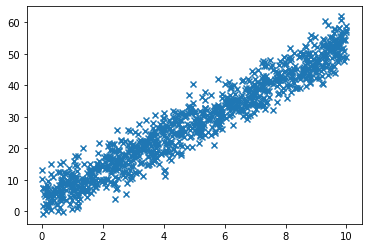

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Implement the gradient descent calculation from the first notebook, but use pytorch for the calculations instead of numpy. To do this, you will need to do the following:
   - Import your X, y, numpy tensors into pytorch using `torch.as_tensor(numpy_array)`. For the weights, create them using numpy as in the first notebook, then convert them to pytorch with `weights = torch.tensor(weights, requires_grad=True)`. This tells pytorch to calculate gradients for this tensor. PyTorch tensors and numpy arrays behave very similarly, which means that the code for your calculations should be essentially the same.
   - After calculating the loss, you do not need to calculate the gradient manually. You can use `loss.backward()` if loss is the variable that contains the final loss value. Then, you can access the gradient using `weights.grad`.
   - When updating the weights with `weights -= learning_rate * weights.grad`, wrap it with a block of
   ```python
   with torch.no_grad():
        weights -= learning_rate * weights.grad
   ```
   This tells pytorch to not calculate a gradient for the `-=` operation that updates the weight tensor (which would cause an error).
   - When coding the loop, make sure to reset the gradient calculation after or before each update using `weights.grad.zero_()`. This ensures that the gradients do not accumulate across multiple loop iterations.
 - If you implement it correctly, you should get the same results as in the first notebook (the gradients should be the same, too).

## Solution

We add an additional column for the bias to the dataset:

In [5]:
X_ = np.c_[X, np.ones((X.shape[0]))]

We initialize a weight matrix with random values:

In [6]:
import torch
num_samples = X_.shape[0]
num_features = X_.shape[1]
X = torch.as_tensor(X_)
y = torch.as_tensor(y)

In [7]:
def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights = generate_weights(num_features)
print(weights.shape)
weights = torch.tensor(weights, requires_grad=True)

(2, 1)
